In [65]:
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
dtrain = pd.read_csv(r'E:\Self_learning\Projects\house-prices-advanced-regression-techniques\train.csv')
dtest = pd.read_csv(r'E:\Self_learning\Projects\house-prices-advanced-regression-techniques\test.csv')

In [68]:
dtrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [69]:
dtest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [70]:
print('Train_data: ',dtrain.shape)
print('Test_data: ', dtest.shape)

Train_data:  (1460, 81)
Test_data:  (1459, 80)


In [71]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [72]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Dealing with missing values

In [73]:
total = dtrain.isnull().sum().sort_values(ascending = False)
total.head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64

In [74]:
# Columns where NaN values have missing 

cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']


# Replace 'NaN' with 'None' in these columns
for col in cols_fillna:
    dtrain[col].fillna('None',inplace=True)
    dtest[col].fillna('None',inplace=True)

In [75]:
dtrain.isnull().sum().sort_values(ascending = False)

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
Id                0
KitchenAbvGr      0
               ... 
ExterQual         0
MasVnrType        0
Exterior2nd       0
Exterior1st       0
SalePrice         0
Length: 81, dtype: int64

In [76]:
# Fillna with mean for the remaining columns : LotFrontage, GarageYrBlt, MasVnrArea

dtrain.fillna(dtrain.mean(), inplace = True)
dtest.fillna(dtrain.mean(), inplace = True)

In [77]:
dtrain.isnull().sum().sum()

0

In [78]:
dtest.isnull().sum().sum()

0

# Distribution Of SalePrice (Target Variable)

Skewness:  1.8828757597682129
Kurtosis:  6.536281860064529


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

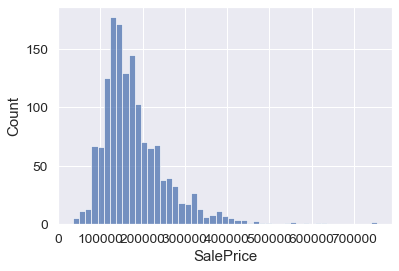

In [79]:
# Skewness mesaure the symmetry (Lack of Symmetry)
# Normal skewness = Mean = Median = Mode
# Positive skewness = Mean > Median > Mode
# Negative skewness = Mode > Median > Mean

# Skewness Coefficient = "(Mean - Mode) / Standard Deviation"

# Skewness btw -0.5 - 0.5 (The Data Is Nearky Symmertrical)
# Skewness btw '-1 - -0.5' (+ve skw) OR '0.5 - 1' (-ve skw) (The Data Is Slightly Skewed)
# Skewness lower than '-1' (-ve skw) OR greater than 1 (+ve skw) (The Data Is Extreamly Skewed)

print('Skewness: ', dtrain['SalePrice'].skew())

# Kurtosis measure the data is Heavey Tailed(Leptokrutic) or Light Tailed(Platykurtic) 
# relative to a normal distribution(Mesokurtic).

# lepo(Long) = kurtosis > 3
# Meso = kurtosis = 3
# Platy(Short) = kurtosis < 3

print('Kurtosis: ', dtrain["SalePrice"].kurt())

sns.histplot(dtrain['SalePrice'])

Skewness:  0.12133506220520406
Kurtosis:  0.8095319958036296


<AxesSubplot:xlabel='SalePrice_lg', ylabel='Density'>

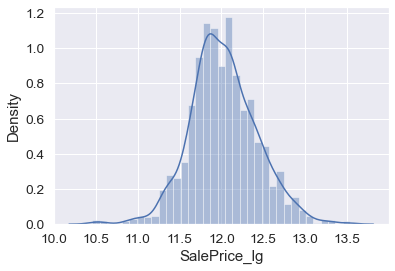

In [80]:
# The skewness is positive but extramly skewed and kurtosis has positive long tail. 

# Log-Tranformation(Feature Engineering) to make skewed data to normal distribution
# Log(x+1)
# Log_tranformation only work on positive skewness.

dtrain['SalePrice_lg'] = np.log(dtrain['SalePrice'])

print('Skewness: ', dtrain['SalePrice_lg'].skew())
print('Kurtosis: ', dtrain['SalePrice_lg'].kurt())

dtrain.drop('SalePrice', axis = 1, inplace = True)

sns.distplot(dtrain['SalePrice_lg'])

# Saprating Numerical & Categorical Features

In [81]:
num_feat = dtrain.dtypes[dtrain.dtypes != 'object'].index
print('Number of Numerical Features: ', len(num_feat))

dtrain[num_feat].columns

Number of Numerical Features:  38


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice_lg'],
      dtype='object')

In [82]:
cat_feat = dtrain.dtypes[dtrain.dtypes == 'object'].index
print('Number of Categorical Features: ', len(cat_feat))

dtrain[cat_feat].columns

Number of Categorical Features:  43


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

# Checking all Features Distribution

In [83]:
for col in num_feat:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(dtrain[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(dtrain[col].kurt())  
         )

Id              Skewness: 00.00     Kurtosis: -01.20
MSSubClass      Skewness: 01.41     Kurtosis: 001.58
LotFrontage     Skewness: 02.38     Kurtosis: 021.85
LotArea         Skewness: 12.21     Kurtosis: 203.24
OverallQual     Skewness: 00.22     Kurtosis: 000.10
OverallCond     Skewness: 00.69     Kurtosis: 001.11
YearBuilt       Skewness: -0.61     Kurtosis: -00.44
YearRemodAdd    Skewness: -0.50     Kurtosis: -01.27
MasVnrArea      Skewness: 02.68     Kurtosis: 010.15
BsmtFinSF1      Skewness: 01.69     Kurtosis: 011.12
BsmtFinSF2      Skewness: 04.26     Kurtosis: 020.11
BsmtUnfSF       Skewness: 00.92     Kurtosis: 000.47
TotalBsmtSF     Skewness: 01.52     Kurtosis: 013.25
1stFlrSF        Skewness: 01.38     Kurtosis: 005.75
2ndFlrSF        Skewness: 00.81     Kurtosis: -00.55
LowQualFinSF    Skewness: 09.01     Kurtosis: 083.23
GrLivArea       Skewness: 01.37     Kurtosis: 004.90
BsmtFullBath    Skewness: 00.60     Kurtosis: -00.84
BsmtHalfBath    Skewness: 04.10     Kurtosis: 

Skewness:  1.3665603560164552
Kurtosis:  4.895120580693174


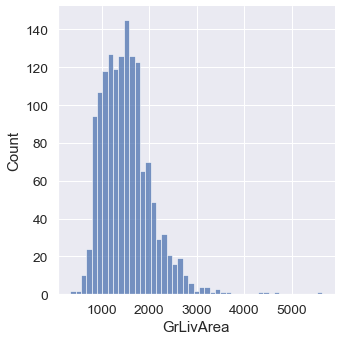

In [84]:
print('Skewness: ', dtrain['GrLivArea'].skew())
print('Kurtosis: ', dtrain['GrLivArea'].kurt())

sns.displot(dtrain['GrLivArea'])

Skewness:  12.207687851233496
Kurtosis:  203.24327101886033


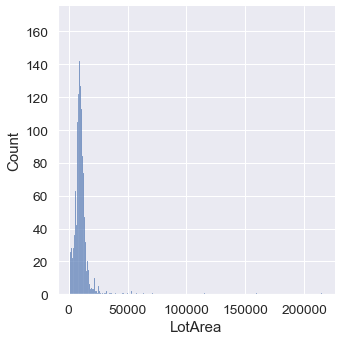

In [85]:
print('Skewness: ', dtrain['LotArea'].skew())
print('Kurtosis: ', dtrain['LotArea'].kurt())

sns.displot(dtrain['LotArea'])

In [86]:
for df in [dtrain, dtest]:
    df['GrLivArea_lg'] = np.log(df['GrLivArea'])
    df.drop('GrLivArea', inplace = True, axis = 1)
    df['LotArea_lg'] = np.log(df['LotArea'])
    df.drop('LotArea', inplace = True, axis = 1)
    
num_feat = dtrain.dtypes[dtrain.dtypes != 'object'].index

Skewness:  -0.006995182187690808
Kurtosis:  0.28260268850118564


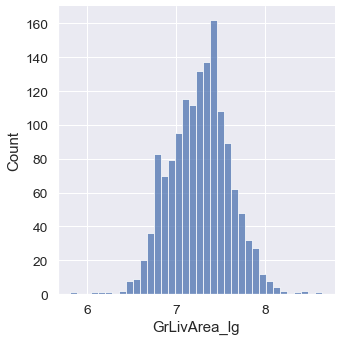

In [87]:
print('Skewness: ', dtrain['GrLivArea_lg'].skew())
print('Kurtosis: ', dtrain['GrLivArea_lg'].kurt())

sns.displot(dtrain['GrLivArea_lg'])

Skewness:  -0.1379938086958118
Kurtosis:  4.713358369108622


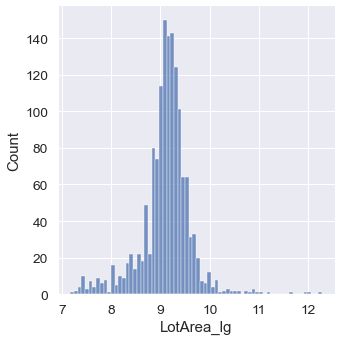

In [88]:
print('Skewness: ', dtrain['LotArea_lg'].skew())
print('Kurtosis: ', dtrain['LotArea_lg'].kurt())

sns.displot(dtrain['LotArea_lg'])

# Relation To SalePrice To All Numrical Features|

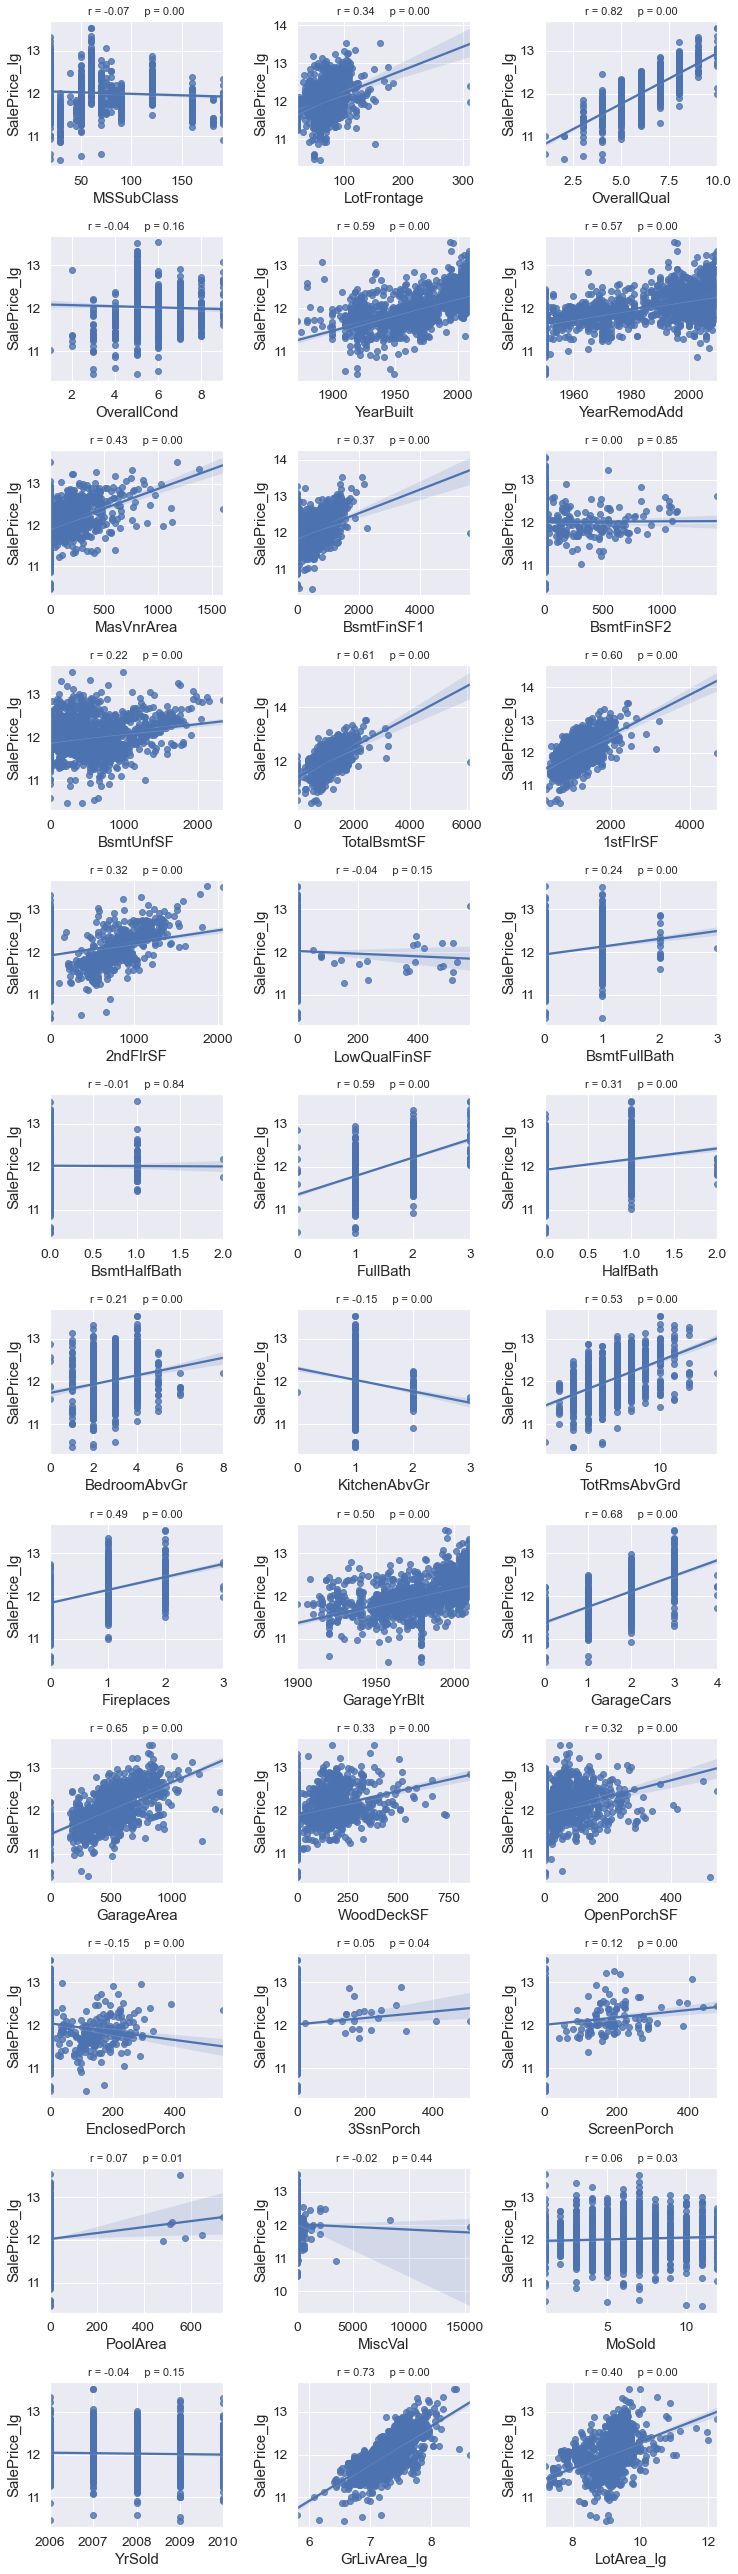

In [89]:
nr_row = 12
nr_col = 3
fig, axs = plt.subplots(nr_row, nr_col, figsize = (nr_col * 3.5, nr_row * 3))

num_feat_list = list(num_feat)
except_feat = ['Id', 'SalePrice_lg', 'SalePrice']

plot_list = [c for c in list(num_feat) if c not in except_feat]

from scipy import stats

for r in range(0, nr_row):
    for c in range(0, nr_col):
        i = r * nr_col + c
        if i < len(plot_list):
            sns.regplot(x = dtrain[plot_list[i]], y = dtrain['SalePrice_lg'], ax = axs[r][c])
            
            stp = stats.pearsonr(dtrain[plot_list[i]], dtrain['SalePrice_lg'])
            
            str_title = 'r = ' + "{0:.2f}".format(stp[0]) + '     ' 'p = ' + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title, fontsize = 11)

plt.tight_layout()
plt.show()

### Outliers

In [90]:
dtrain = dtrain.drop(dtrain[(dtrain['OverallQual'] == 10) & (dtrain['SalePrice_lg'] < 12.3)].index)

In [93]:
dtrain = dtrain.drop(dtrain[(dtrain['GrLivArea_lg'] > 8.3) & (dtrain['SalePrice_lg'] < 12.5)].index)

In [94]:

corr = dtrain.corr()
corr_abs = corr.abs()

nr_num_cols = len(num_feat)
ser_corr = corr_abs.nlargest(nr_num_cols, 'SalePrice_lg')['SalePrice_lg']

cols_abv_corr_limit = list(ser_corr[ser_corr.values > 0.4].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= 0.4].index)

In [97]:
print(ser_corr)

SalePrice_lg     1.000000
OverallQual      0.821404
GrLivArea_lg     0.737427
GarageCars       0.681033
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
Fireplaces       0.491998
MasVnrArea       0.433353
LotArea_lg       0.402814
BsmtFinSF1       0.392283
LotFrontage      0.352432
WoodDeckSF       0.334250
OpenPorchSF      0.325215
2ndFlrSF         0.319953
HalfBath         0.314186
BsmtFullBath     0.237099
BsmtUnfSF        0.221892
BedroomAbvGr     0.209036
EnclosedPorch    0.149029
KitchenAbvGr     0.147534
ScreenPorch      0.121245
PoolArea         0.074338
MSSubClass       0.073969
MoSold           0.057064
3SsnPorch        0.054914
LowQualFinSF     0.037951
YrSold           0.037151
OverallCond      0.036821
MiscVal          0.020012
Id               0.017774
BsmtHalfBath     0.005124
BsmtFinSF2       0.004863
Name: SalePr

In [98]:
print('List of numerical features with r above 0.4:', cols_abv_corr_limit)

List of numerical features with r above 0.4: ['SalePrice_lg', 'OverallQual', 'GrLivArea_lg', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'GarageYrBlt', 'Fireplaces', 'MasVnrArea', 'LotArea_lg']


### Relation between SalePrice to all categorial features

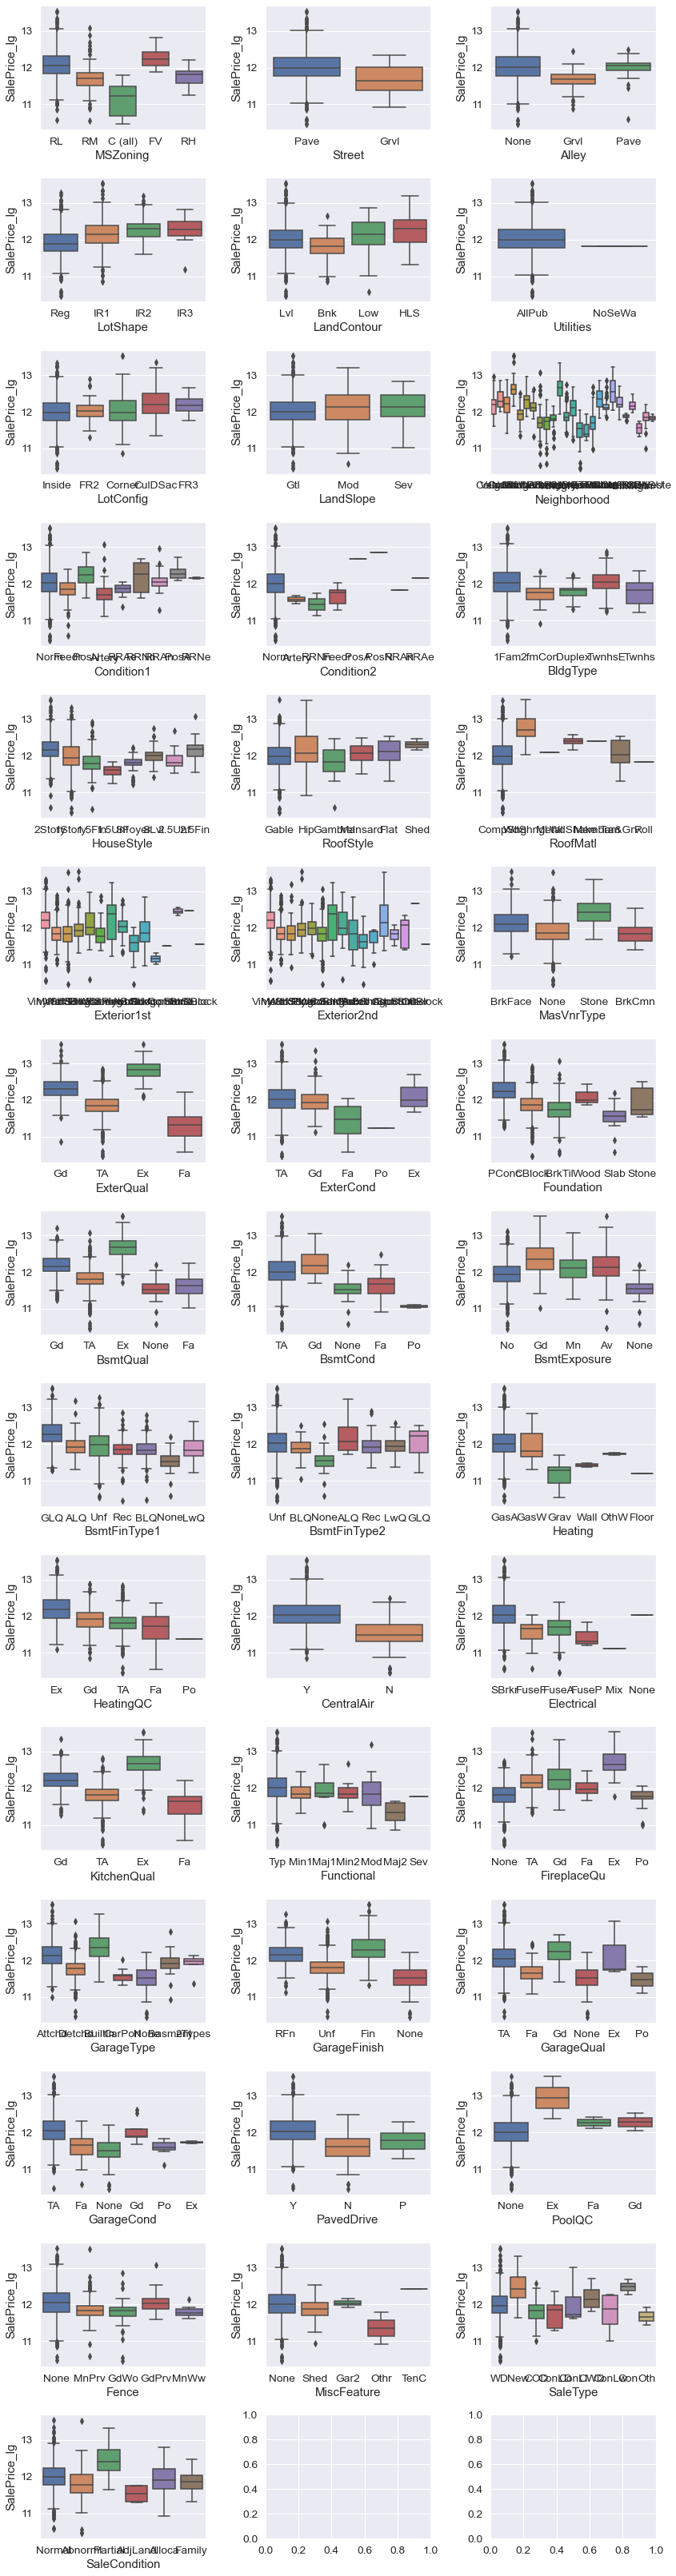

In [107]:
li_cat_feats = list(cat_feat)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y='SalePrice_lg', data=dtrain, ax = axs[r][c])
    
plt.tight_layout()    
plt.show() 

In [108]:
# Strong categorical Correlation:
#'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual',
#'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType'

# Weak Categorical Correlation:
#'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
#'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 
#'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
#'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
#'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
#'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature','SaleCondition'

In [109]:
def plot_corr_matrix(df, nr_c, targ) :
    
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )
    plt.show()

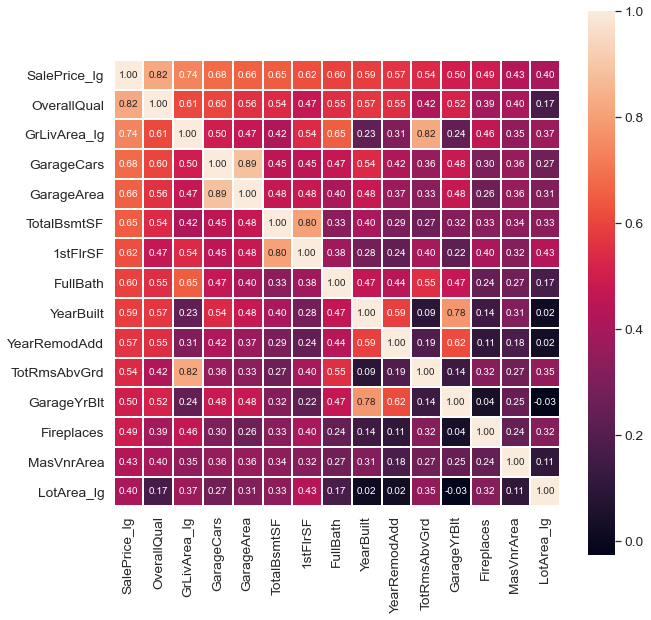

In [110]:
nr_feats = len(cols_abv_corr_limit)
plot_corr_matrix(dtrain, nr_feats, 'SalePrice_lg')